## 1. Objetivo:
 Aplicar os conceitos de Processamento de Linguagem Natural (PLN) para construir um pipeline completo de classificação de texto

### 1.1. Objetivos específicos

* Realizar o pré-processamento de texto, incluindo limpeza, tokenização, remoção de stopwords e stemming/lemmatization
* Implementar diferentes métodos de extração de característixas (BagofWords, TF-IDF, Word Embeddings)
* Treinar modelos de aprendizado de máquina para classificação de texto
* Avaliar o desempenho de modelos utilizando métricas apropriadas
* Comparar o desempenho de diferentes modelos e métodos de extração

### Etapa 0: Criando a base de dados a ser utilizada

In [ ]:
# Criação da base de dados a ser utilizada para treinamento e teste

# Importa a biblioteca pandas, utilizada para manipulação de dados em formato tabular
import pandas as pd

# Define um dicionário com duas chaves:
# - 'texto': lista de frases representando opiniões diversas
# - 'categoria': lista de rótulos associados aos textos (positivo ou negativo)
data = {
    'texto': [
        "Este é um ótimo filme!",
        "O produto é muito ruim.",
        "Adorei o atendimento ao cliente.",
        "A entrega atrasou e o produto veio com defeito.",
        "Recomendo este livro a todos!",
        "Não gostei da experiência.",
        "O serviço foi excelente.",
        "Péssima qualidade, não comprem!",
        "Amei o presente, muito obrigado!",
        "Que decepção, perdi meu dinheiro."
    ],
    'categoria': [
        "positivo",
        "negativo",
        "positivo",
        "negativo",
        "positivo",
        "negativo",
        "positivo",
        "negativo",
        "positivo",
        "negativo"
    ]
}

# Constrói um DataFrame a partir do dicionário definido acima
# O DataFrame é uma estrutura bidimensional semelhante a uma tabela
df = pd.DataFrame(data)

# Exporta o DataFrame para um arquivo CSV (valores separados por vírgula)
# Esse arquivo pode ser reutilizado para carregar os dados em futuros experimentos
df.to_csv('dados_rotulados.csv', index=False, encoding='utf-8')

# Confirma visualmente a criação e o salvamento do arquivo
print("Base de dados criada e salva em 'dados_rotulados.csv'")


Base de dados criada e salva em 'dados_rotulados.csv'


### Etapa 1: Preparação dos dados

In [ ]:
# Passo 1: importação das bibliotecas necessárias para pré-processamento e modelagem

# nltk (Natural Language Toolkit): biblioteca para processamento de linguagem natural
import nltk

# spacy: biblioteca avançada para análise linguística (não será utilizada diretamente neste trecho, mas pode ser usada para lematização e parsing)
import spacy

# sklearn (scikit-learn): biblioteca para tarefas de aprendizado de máquina
import sklearn

# pandas: biblioteca para manipulação e análise de dados tabulares
import pandas as pd

# matplotlib.pyplot: módulo usado para geração de gráficos e visualizações
import matplotlib.pyplot as plt

# string: biblioteca padrão do Python com utilitários para manipulação de caracteres e pontuação
import string

# stopwords: palavras comuns da língua que geralmente são removidas em pré-processamento (ex: "de", "a", "o")
from nltk.corpus import stopwords

# word_tokenize: função do NLTK usada para dividir o texto em palavras (tokens)
from nltk.tokenize import word_tokenize

# SnowballStemmer: algoritmo para redução de palavras à sua raiz (ex: "correndo" → "corr")
from nltk.stem import SnowballStemmer

# train_test_split: função que divide os dados em conjuntos de treino e teste
from sklearn.model_selection import train_test_split

# Download dos recursos necessários do NLTK

# Baixa a lista de stopwords em português e outras línguas
nltk.download('stopwords')

# Baixa o tokenizer padrão de palavras
# OBS: a chave correta para tokenização de palavras é 'punkt', não 'punkt_tab'
# Caso 'punkt_tab' esteja no código original por engano, o correto seria:
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Informações do conjunto de dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   texto      10 non-null     object
 1   categoria  10 non-null     object
dtypes: object(2)
memory usage: 292.0+ bytes
None

Primeiras 5 linhas do conjunto de dados:
                                             texto categoria
0                           Este é um ótimo filme!  positivo
1                          O produto é muito ruim.  negativo
2                 Adorei o atendimento ao cliente.  positivo
3  A entrega atrasou e o produto veio com defeito.  negativo
4                    Recomendo este livro a todos!  positivo


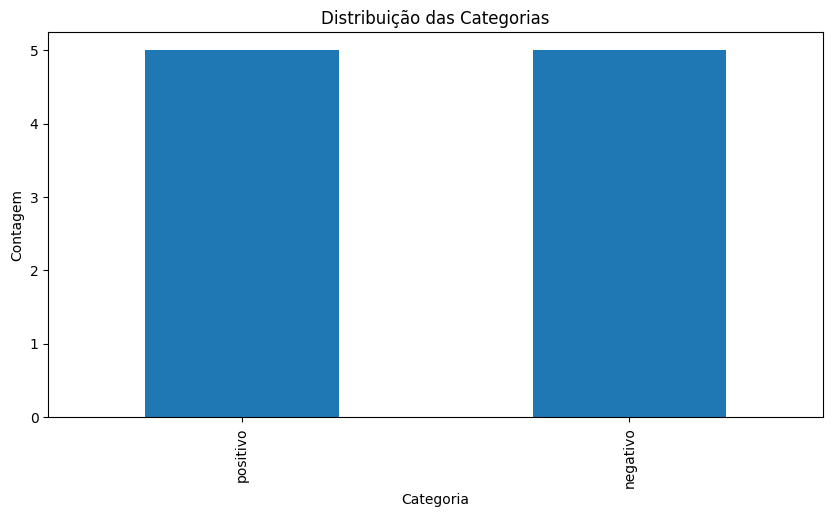

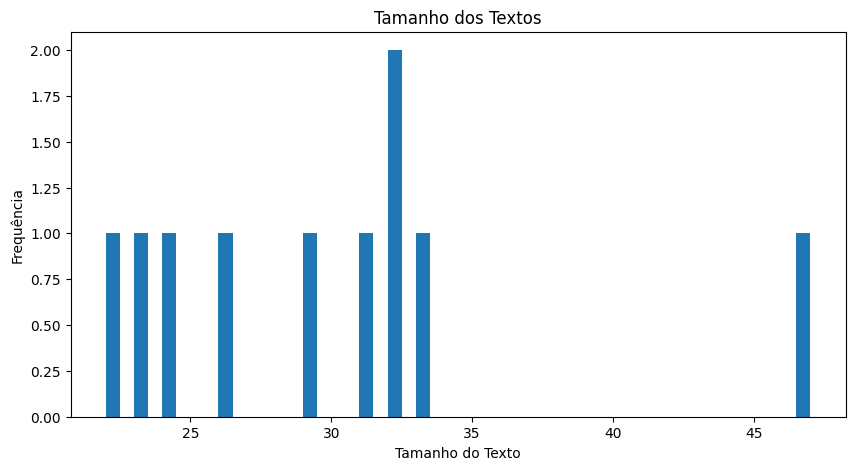

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
# Passo 2: carregamento do conjunto de dados previamente salvo em CSV

# Lê o arquivo 'dados_rotulados.csv' e armazena o conteúdo em um DataFrame
# O parâmetro encoding='utf-8' garante a leitura correta de acentuação e caracteres especiais
data = pd.read_csv('dados_rotulados.csv', encoding='utf-8')

# Passo 3: exploração inicial e visualização dos dados

# Exibe informações estruturais do DataFrame, como número de entradas e tipos de dados
print("Informações do conjunto de dados:")
print(data.info())

# Exibe as 5 primeiras linhas da tabela para inspeção rápida
print("\nPrimeiras 5 linhas do conjunto de dados:")
print(data.head())

# Visualiza a distribuição das categorias (positivo e negativo) no conjunto de dados
plt.figure(figsize=(10, 5))
data['categoria'].value_counts().plot(kind='bar')
plt.title('Distribuição das Categorias')
plt.xlabel('Categoria')
plt.ylabel('Contagem')
plt.show()

# Calcula o número de caracteres em cada texto e plota a distribuição dos tamanhos
tamanhos_textos = data['texto'].apply(len)
plt.figure(figsize=(10, 5))
plt.hist(tamanhos_textos, bins=50)
plt.title('Tamanho dos Textos')
plt.xlabel('Tamanho do Texto')
plt.ylabel('Frequência')
plt.show()

# Passo 4: pré-processamento dos textos (limpeza e preparação para vetorização)

def preprocessar_texto(texto):
    # Passo 4.1: remoção de pontuação e dígitos numéricos
    texto = texto.translate(str.maketrans('', '', string.punctuation))  # remove pontuações
    texto = ''.join([c for c in texto if not c.isdigit()])  # remove números

    # Passo 4.2: tokenização das palavras (conversão para minúsculas e divisão por palavras)
    tokens = word_tokenize(texto.lower())

    # Passo 4.3: remoção de stopwords (palavras comuns sem valor semântico forte)
    stop_words = set(stopwords.words('portuguese'))
    tokens = [palavra for palavra in tokens if palavra not in stop_words]

    # Passo 4.4: aplicação de stemming para reduzir palavras à sua raiz
    stemmer = SnowballStemmer('portuguese')
    tokens = [stemmer.stem(palavra) for palavra in tokens]

    # Junta os tokens processados em uma única string novamente
    return ' '.join(tokens)

# Aplica a função de pré-processamento a cada texto do DataFrame
data['texto_processado'] = data['texto'].apply(preprocessar_texto)

# Passo 5: divisão do conjunto em dados de treino e teste

# A função train_test_split separa os dados em:
# - X_train: textos processados para treino
# - X_test: textos processados para teste
# - y_train: rótulos (categorias) correspondentes ao treino
# - y_test: rótulos correspondentes ao teste
X_train, X_test, y_train, y_test = train_test_split(
    data['texto_processado'], data['categoria'], test_size=0.2, random_state=42)

# Exibe o número de amostras em cada subconjunto gerado
print("\nTamanho do conjunto de treinamento:", len(X_train))
print("Tamanho do conjunto de teste:", len(X_test))


### Etapa 2: Extração de características

In [ ]:
# Importação das bibliotecas utilizadas para vetorização, modelagem e avaliação

# TfidfVectorizer: converte textos em vetores numéricos com pesos baseados na frequência e relevância das palavras
from sklearn.feature_extraction.text import TfidfVectorizer

# MultinomialNB: algoritmo Naive Bayes Multinomial, adequado para classificação de texto com base em frequências
from sklearn.naive_bayes import MultinomialNB

# accuracy_score e classification_report: métricas de avaliação da performance do modelo
from sklearn.metrics import accuracy_score, classification_report

# train_test_split já foi utilizado anteriormente para dividir os dados

# Etapa 2: extração de características com TF-IDF

# Inicializa o vetor de transformação TF-IDF
# Esta técnica atribui peso maior às palavras frequentes em um texto, mas raras no conjunto
vectorizer = TfidfVectorizer()

# Ajusta o vetorizador com os dados de treino e transforma os textos em vetores numéricos esparsos
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transforma os dados de teste usando o mesmo vocabulário do treino
X_test_tfidf = vectorizer.transform(X_test)

# Exibe a quantidade total de características (palavras ou n-gramas) extraídas do vocabulário
print("\nNúmero de características extraídas: ", X_train_tfidf.shape[1])

# Etapa 3: treinamento do modelo de classificação

# Instancia o classificador Naive Bayes Multinomial
modelo = MultinomialNB()

# Treina o modelo utilizando os vetores TF-IDF e os rótulos do conjunto de treino
modelo.fit(X_train_tfidf, y_train)

# Passo 4: avaliação do modelo

# Realiza a previsão dos rótulos para os dados de teste
y_pred = modelo.predict(X_test_tfidf)

# Calcula a acurácia (proporção de acertos) do modelo
acuracia = accuracy_score(y_test, y_pred)

# Exibe a acurácia e o relatório de desempenho detalhado (precisão, recall e F1-score por classe)
print("\nAcurácia do modelo:", acuracia)
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

# Passo 5: classificação de um novo texto utilizando o modelo treinado

# Define função auxiliar para aplicar todas as etapas de pré-processamento e predição
def classificar_texto(texto, vectorizer, modelo):
    # Pré-processamento do texto de entrada
    texto_processado = preprocessar_texto(texto)

    # Vetorização com o modelo TF-IDF treinado
    texto_tfidf = vectorizer.transform([texto_processado])

    # Predição da categoria mais provável
    categoria_prevista = modelo.predict(texto_tfidf)[0]

    # (Opcional) obtenção das probabilidades associadas a cada categoria
    probabilidades = modelo.predict_proba(texto_tfidf)[0]
    categorias = modelo.classes_
    probabilidades_por_categoria = dict(zip(categorias, probabilidades))

    return categoria_prevista, probabilidades_por_categoria

# Exemplo de uso da função com um novo texto
novo_texto = "Este filme é incrível, recomendo a todos"
categoria, probabilidades = classificar_texto(novo_texto, vectorizer, modelo)

# Exibe os resultados da classificação
print("\nNovo texto:", novo_texto)
print("Categoria prevista: ", categoria)
print("Probabilidades por categoria:", probabilidades)


**Comentário**

O uso de TF-IDF aqui é adequado por valorizar termos relevantes para cada documento, atenuando o peso de palavras muito frequentes. Isso ajuda na separação entre classes de sentimentos, tornando o modelo mais sensível às palavras distintivas. É uma escolha superior ao CountVectorizer para tarefas onde a frequência relativa importa mais que a bruta.

### Etapa 3: Treinamento do modelo

In [ ]:
# Importação das ferramentas utilizadas para modelagem e ajuste de hiperparâmetros

# LogisticRegression: classificador linear amplamente utilizado em tarefas de classificação binária
from sklearn.linear_model import LogisticRegression

# SVC: Support Vector Classifier (SVM), utilizado para encontrar hiperplanos de separação ótimos
from sklearn.svm import SVC

# GridSearchCV: ferramenta para ajuste de hiperparâmetros com validação cruzada
from sklearn.model_selection import GridSearchCV

# Etapa 3: treinamento dos modelos de aprendizado de máquina

# Passo 1: escolha de modelos para experimentação
# Neste caso, são utilizados três classificadores: Naive Bayes, Regressão Logística e SVM

# Passo 2: instanciação dos modelos
naive_bayes_model = MultinomialNB()
logistic_regression_model = LogisticRegression(random_state=42)
svm_model = SVC(random_state=42, probability=True)  # probability=True necessário para obter predict_proba()

# Passo 3: treinamento dos modelos com os vetores TF-IDF
naive_bayes_model.fit(X_train_tfidf, y_train)
svm_model.fit(X_train_tfidf, y_train)

# Passo 4: ajuste de hiperparâmetros com validação cruzada

# Define a grade de parâmetros a ser explorada para cada modelo
# Naive Bayes não exige ajuste de hiperparâmetros em sua configuração padrão
param_grid_nb = {}

# Parâmetros para ajuste da Regressão Logística: força da regularização (C) e algoritmo de otimização (solver)
param_grid_lr = {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}

# Parâmetros para ajuste do SVM: força da margem (C) e tipo de kernel (linear ou radial)
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Inicializa o processo de busca em grade com validação cruzada (cv=2)
grid_search_lr = GridSearchCV(logistic_regression_model, param_grid_lr, cv=2)
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=2)

# Ajusta os modelos com os melhores hiperparâmetros encontrados durante a validação cruzada
grid_search_lr.fit(X_train_tfidf, y_train)
grid_search_svm.fit(X_train_tfidf, y_train)

# Exibe os melhores parâmetros encontrados para cada modelo
print("\nMelhores hiperparâmetros para Regressão Logística: ", grid_search_lr.best_params_)
print("Melhores hiperparâmetros para SVM:", grid_search_svm.best_params_)

# Obtém os modelos já ajustados com os melhores parâmetros
best_logistic_regression_model = grid_search_lr.best_estimator_
best_svm_model = grid_search_svm.best_estimator_

# Passo 4: avaliação dos modelos utilizando os dados de teste

print("\nResultados da avaliação:")

# Avaliação do modelo Naive Bayes
y_pred_nb = naive_bayes_model.predict(X_test_tfidf)
acuracia_nb = accuracy_score(y_test, y_pred_nb)
print("\nNaive Bayes Multinomial:")
print("Acurácia:", acuracia_nb)
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_nb))

# Avaliação do modelo Regressão Logística ajustado com GridSearchCV
y_pred_lr = best_logistic_regression_model.predict(X_test_tfidf)
acuracia_lr = accuracy_score(y_test, y_pred_lr)
print("\nRegressão Logística:")
print("Acurácia", acuracia_lr)
print("Relatório de Classificação: \n", classification_report(y_test, y_pred_lr))

# Passo 5: classificação de um novo texto com qualquer modelo treinado

# Define função reutilizável para classificar novos textos usando qualquer modelo treinado
def classificar_texto(texto, vectorizer, modelo):
    # Aplica pré-processamento ao texto original
    texto_processado = preprocessar_texto(texto)

    # Transforma o texto em vetor TF-IDF
    texto_tfidf = vectorizer.transform([texto_processado])

    # Predição da categoria
    categoria_prevista = modelo.predict(texto_tfidf)[0]

    # (Opcional) cálculo das probabilidades associadas a cada classe
    probabilidades = modelo.predict_proba(texto_tfidf)[0]
    categorias = modelo.classes_
    probabilidades_por_categoria = dict(zip(categorias, probabilidades))

    return categoria_prevista, probabilidades_por_categoria


In [ ]:
# Exemplo de uso da função para classificar um novo texto

# Texto a ser classificado
novo_texto = "Este filme é incrível, recomendo a todos!"

# Classificação do texto utilizando os três modelos treinados
categoria_nb, probabilidades_nb = classificar_texto(novo_texto, vectorizer, naive_bayes_model)
categoria_lr, probabilidades_lr = classificar_texto(novo_texto, vectorizer, best_logistic_regression_model)
categoria_svm, probabilidades_svm = classificar_texto(novo_texto, vectorizer, best_svm_model)

# Impressão dos resultados de classificação
print("\nNovo texto:", novo_texto)
print("\nResultados da classificação:")

print("\nNaive Bayes Multinomial:")
print("Categoria prevista:", categoria_nb)
print("Probabilidade por categoria:", probabilidades_nb)

print("\nRegressão Logística:")
print("Categoria prevista:", categoria_lr)
print("Probabilidade por categoria:", probabilidades_lr)

print("\nSVM:")
print("Categoria prevista:", categoria_svm)
print("Probabilidades por categoria:", probabilidades_svm)


### Etapa 4: Avaliação do modelo

In [ ]:
# Etapa 4: Avaliação do modelo
# Passo 1: Fazer previsões no conjunto de teste usando os modelos treinados
# Passo 2: Calcular as métricas de desempenho apropriadas (precisão, revocação, F1-score, acurácia)
# Passo 3: Exibir e analisar os resultados

print("\nEtapa: Avaliação do Modelo")
print("\nResultados da Avaliação:")

# Avaliação do modelo Naive Bayes
y_pred_nb = naive_bayes_model.predict(X_test_tfidf)
acuracia_nb = accuracy_score(y_test, y_pred_nb)
print("\nNaive Bayes Multinomial:")
print("Acurácia:", acuracia_nb)
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_nb, zero_division=0))

# Avaliação do modelo de Regressão Logística
y_pred_lr = best_logistic_regression_model.predict(X_test_tfidf)
acuracia_lr = accuracy_score(y_test, y_pred_lr)
print("\nRegressão Logística:")
print("Acurácia:", acuracia_lr)
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_lr, zero_division=0))

# Avaliação do modelo SVM
y_pred_svm = best_svm_model.predict(X_test_tfidf)
acuracia_svm = accuracy_score(y_test, y_pred_svm)
print("\nSVM:")
print("Acurácia:", acuracia_svm)
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_svm, zero_division=0))

# Passo 4: Comparar o desempenho dos diferentes modelos
print("\nComparação de Modelos:")
print(f"- Acurácia Naive Bayes: {acuracia_nb:.4f}")
print(f"- Acurácia Regressão Logística: {acuracia_lr:.4f}")
print(f"- Acurácia SVM: {acuracia_svm:.4f}")

# Visualização gráfica da comparação de acurácia
modelos = ['Naive Bayes', 'Regressão Logística', 'SVM']
acuracias = [acuracia_nb, acuracia_lr, acuracia_svm]

plt.figure(figsize=(8, 6))
plt.bar(modelos, acuracias, color=['blue', 'green', 'red'])
plt.xlabel('Modelo')
plt.ylabel('Acurácia')
plt.title('Comparação de Acurácia dos Modelos')
plt.ylim(0, 1)  # Define o limite do eixo Y entre 0 e 1
plt.show()


### Etapa 5: Classificação de um novo texto

In [ ]:
# Etapa 5: Classificação de um novo texto

print("\nEtapa 5: Classificação de um novo texto")

# Função para classificar um novo texto com qualquer modelo treinado
def classificar_novo_texto(texto, vectorizer, modelo):
  # Etapa 1: Pré-processar o texto usando a mesma função do treinamento
  texto_processado = preprocessar_texto(texto)

  # Etapa 2: Transformar o texto pré-processado em vetor numérico TF-IDF
  # A vetorização deve ser feita com o mesmo vetor (vectorizer) treinado anteriormente
  texto_tfidf = vectorizer.transform([texto_processado])

  # Etapa 3: Fazer a predição da categoria com base no texto vetorizado
  categoria_prevista = modelo.predict(texto_tfidf)[0]  # [0] pois retorna uma lista com um único elemento

  try:
    # Tentar obter as probabilidades de cada categoria (se o modelo suportar)
    probabilidades = modelo.predict_proba(texto_tfidf)[0]  # [0] pois é apenas um texto
    categorias = modelo.classes_  # Lista das classes possíveis no modelo
    # Criar um dicionário mapeando categoria → probabilidade
    probabilidades_por_categoria = dict(zip(categorias, probabilidades))
    return categoria_prevista, probabilidades_por_categoria

  except AttributeError:
    # Caso o modelo não tenha suporte para predict_proba (ex: SVM sem probability=True)
    # Retorna apenas a categoria prevista, sem probabilidades
    return categoria_prevista, {}

# Exemplo prático: texto a ser classificado
novo_texto = "Este filme é incrível, recomendo a todos!"
print("\nNovo texto:", novo_texto)

# Classificação com modelo Naive Bayes
categoria_nb, probabilidades_nb = classificar_novo_texto(novo_texto, vectorizer, naive_bayes_model)
print("\nNaive Bayes:")
print("Categoria prevista:", categoria_nb)
if probabilidades_nb:
  print("Probabilidades:", probabilidades_nb)

# Classificação com modelo de Regressão Logística
categoria_lr, probabilidades_lr = classificar_novo_texto(novo_texto, vectorizer, best_logistic_regression_model)
print("\nRegressão Logística:")
print("Categoria prevista:", categoria_lr)
if probabilidades_lr:
  print("Probabilidades:", probabilidades_lr)

# Classificação com modelo SVM
categoria_svm, probabilidades_svm = classificar_novo_texto(novo_texto, vectorizer, best_svm_model)
print("\nSVM:")
print("Categoria prevista:", categoria_svm)
if probabilidades_svm:
  print("Probabilidades:", probabilidades_svm)


### Bloco explicativo: Etapa 5 — Classificação de um novo texto

A etapa 5 representa o momento mais prático e aplicável de todo o pipeline de PNL construído neste curso: usar o modelo treinado para classificar texto real. Aqui, combinamos todo o conhecimento prévio (pré-processamento, vetorização, treinamento e avaliação) em uma função utilitária que recebe qualquer texto, o processa e retorna a categoria prevista (sentimento, tópico, etc.).

Além disso, o código é muito flexível: ele tenta retornar a probabilidade de cada categoria usando a função predict_proba, que é muito útil para análises mais complexas, como:

- tomar decisões baseadas em confiança do modelo,
- comparar incertezas entre diferentes classificadores,
- ou mesmo construir interfaces com barras de confiança.

Essa etapa também serve como avaliação indireta da generalização do modelo, já que estamos testando em textos fora da base de treino. Caso as previsões estejam erradas ou inconsistentes, é um sinal de que o modelo precisa de mais dados, ajustes no pré-processamento ou até troca no algoritmo.

Por fim, é uma excelente oportunidade para refletir sobre limitações e possíveis melhorias:

- O modelo SVM, por exemplo, não retorna probabilidades por padrão — o que pode ser resolvido com probability=True no momento da criação.
- A função preprocessar_texto() pode ser aprimorada com remoção de stopwords, lematização, ou uso de embeddings mais ricos.